로치의 데이터를 기반으로 k-최근접 이웃 회귀 알고리즘, 선형회귀알고리즘을 활용하여 로치의 특성을 가지고 무게를 예측하는 모델
Weight, Length1 컬럼 사용

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# 1. 데이터 셋 준비하기

- https://drive.google.com/drive/folders/15eNbhGQAHmeicbjOKThSnFvuNBst-8ME?usp=share_link

- Fish.csv 파일 참조

- Weight, Length1 두개의 특성을 사용

In [19]:
df = pd.read_csv('Data\Roach.csv', header=0)
x = df[["Length1", "Length2", "Length3", "Height", "Width"]].to_numpy()
y = np.array(df[["Weight"]].values.tolist())

print(x)

[[12.9    14.1    16.2     4.1472  2.268 ]
 [16.5    18.2    20.3     5.2983  2.8217]
 [17.5    18.8    21.2     5.5756  2.9044]
 [18.2    19.8    22.2     5.6166  3.1746]
 [18.6    20.     22.2     6.216   3.5742]
 [19.1    20.8    23.1     6.1677  3.3957]
 [19.4    21.     23.7     6.1146  3.2943]
 [20.4    22.     24.7     5.8045  3.7544]
 [20.5    22.     24.3     6.6339  3.5478]
 [20.5    22.5    25.3     7.0334  3.8203]
 [21.     22.5    25.      6.55    3.325 ]
 [21.1    22.5    25.      6.4     3.8   ]
 [22.     24.     27.2     7.5344  3.8352]
 [22.     23.4    26.7     6.9153  3.6312]
 [22.1    23.5    26.8     7.3968  4.1272]
 [23.6    25.2    27.9     7.0866  3.906 ]
 [24.     26.     29.2     8.8768  4.4968]
 [25.     27.     30.6     8.568   4.7736]
 [29.5    31.7    35.      9.485   5.355 ]]


2. 데이터 나누기

In [20]:
trainInput, testInput, trainTarget, testTarget = train_test_split(x, y, random_state=42)
print(trainInput.shape, trainTarget.shape)
print(testInput.shape, testTarget.shape)

(14, 5) (14, 1)
(5, 5) (5, 1)


In [25]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(trainInput)
trainPoly = poly.transform(trainInput)

print(trainPoly.shape)

(14, 20)


In [26]:
testPoly = poly.transform(testInput)

print(testPoly.shape)

(5, 20)


In [32]:
lr = LinearRegression()
lr.fit(trainPoly, trainTarget)
print(lr.score(trainPoly, trainTarget))

1.0


In [33]:
print(lr.score(testPoly, testTarget))

0.4003149885846832


In [37]:
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(trainInput)
trainPoly = poly.transform(trainInput)
testPoly = poly.transform(testInput)

print(trainPoly.shape)

(14, 251)


In [38]:
lr.fit(trainPoly, trainTarget)
print(lr.score(trainPoly, trainTarget))

1.0


In [41]:
print(lr.score(testPoly, testTarget))

0.71210684097359


In [45]:
ss = StandardScaler()
ss.fit(trainPoly)
trainScaled = ss.transform(trainPoly)
testScaled = ss.transform(testPoly)

In [46]:
ridge = Ridge()
ridge.fit(trainScaled, trainTarget)
print(ridge.score(trainScaled, trainTarget))

0.9900100814561585


In [47]:
print(ridge.score(testScaled, testTarget))

0.9603369006246022


알파값을통한 최적화

In [48]:
trainScore = []
testScore = []

alphaList = [0.001, 0.01, 0.1, 1, 10, 100]

for i in alphaList:
    ridge = Ridge(alpha = i)
    ridge.fit(trainScaled, trainTarget)
    trainScore.append(ridge.score(trainScaled, trainTarget))
    testScore.append(ridge.score(testScaled, testTarget))

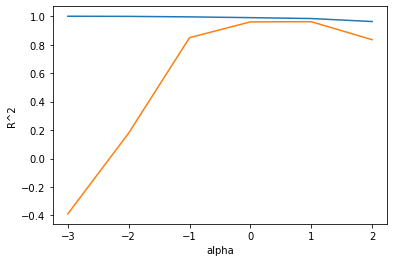

In [49]:
plt.plot(np.log10(alphaList), trainScore)
plt.plot(np.log10(alphaList), testScore)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [53]:
ridge = Ridge(alpha=10)
ridge.fit(trainScaled, trainTarget)
print(ridge.score(trainScaled, trainTarget))
print(ridge.score(testScaled, testTarget))

0.9837211882247703
0.9614807207158744
